# Bent IC and Text Detection

In [6]:
from matplotlib import pyplot as plt
from PIL import Image
from detector import Detector
import os
from DataAugmentator import get_boxes, read_boxes, overlay_good_pins
%matplotlib inline

Number of bent pins in file: 0


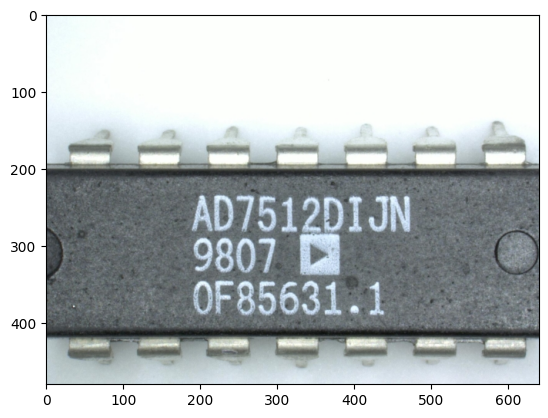


0: 608x800 15 okays, 1 package, 2 texts, 216.3ms
Speed: 2.0ms preprocess, 216.3ms inference, 0.5ms postprocess per image at shape (1, 3, 608, 800)
### detector.py: It took 0.4510021209716797 seconds to execute!


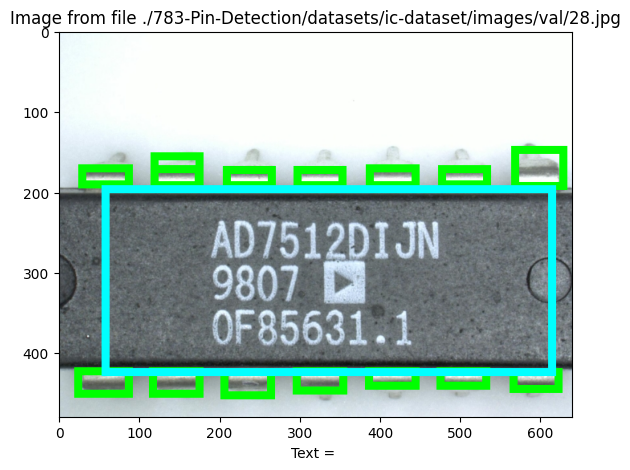

Number of bent pins in file: 2


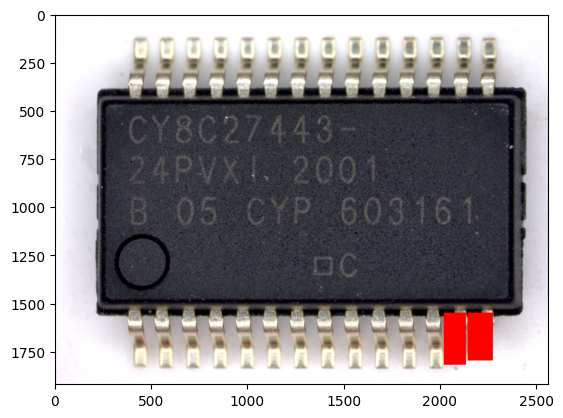


0: 608x800 2 bents, 27 okays, 1 package, 1 text, 226.8ms
Speed: 2.6ms preprocess, 226.8ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 800)
### detector.py: It took 0.6144611835479736 seconds to execute!


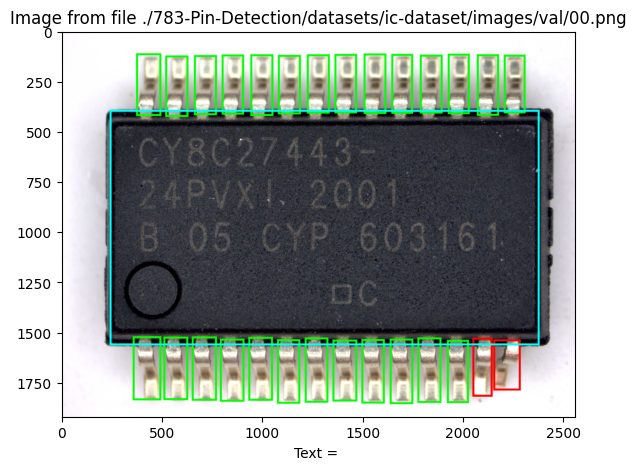

Number of bent pins in file: 19


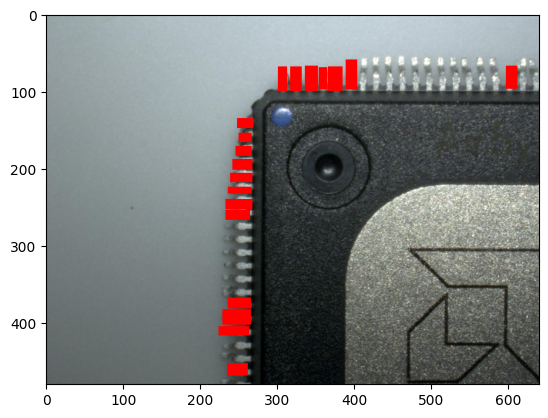


0: 608x800 21 bents, 22 okays, 1 package, 195.6ms
Speed: 2.2ms preprocess, 195.6ms inference, 0.7ms postprocess per image at shape (1, 3, 608, 800)
### detector.py: It took 0.32856297492980957 seconds to execute!


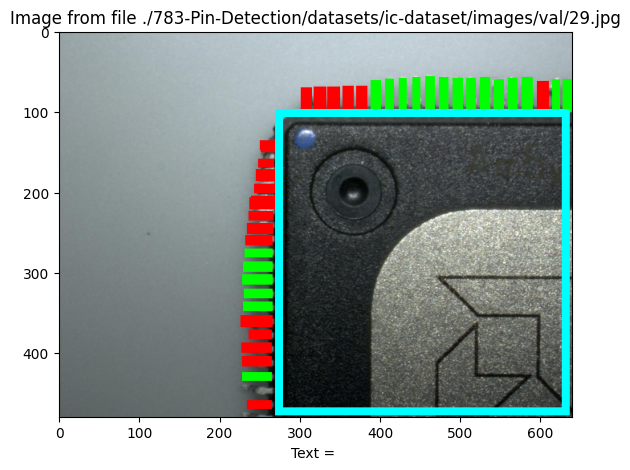

Number of bent pins in file: 0


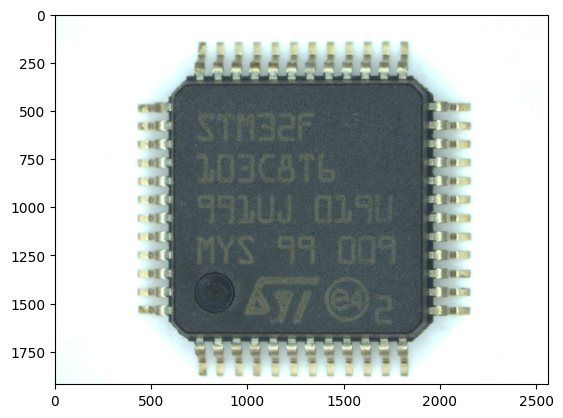


0: 608x800 48 okays, 1 package, 1 text, 195.4ms
Speed: 3.0ms preprocess, 195.4ms inference, 0.6ms postprocess per image at shape (1, 3, 608, 800)
### detector.py: It took 0.5316729545593262 seconds to execute!


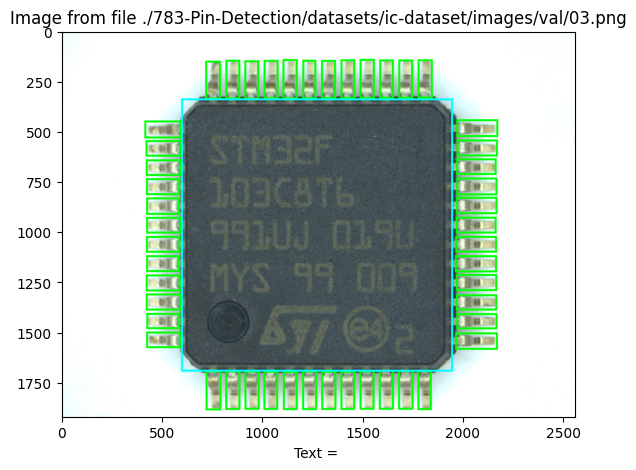

Number of bent pins in file: 3


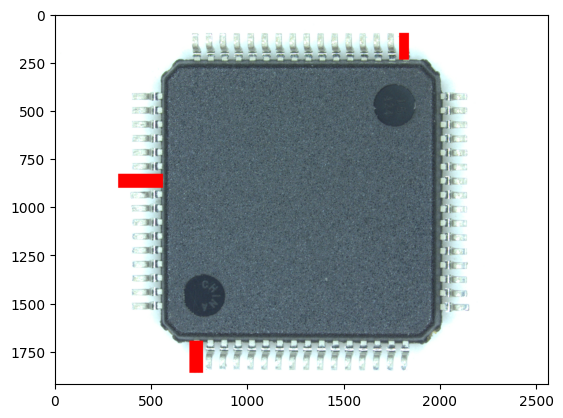


0: 608x800 2 bents, 65 okays, 1 package, 2 texts, 210.0ms
Speed: 2.8ms preprocess, 210.0ms inference, 0.8ms postprocess per image at shape (1, 3, 608, 800)
### detector.py: It took 0.5530238151550293 seconds to execute!


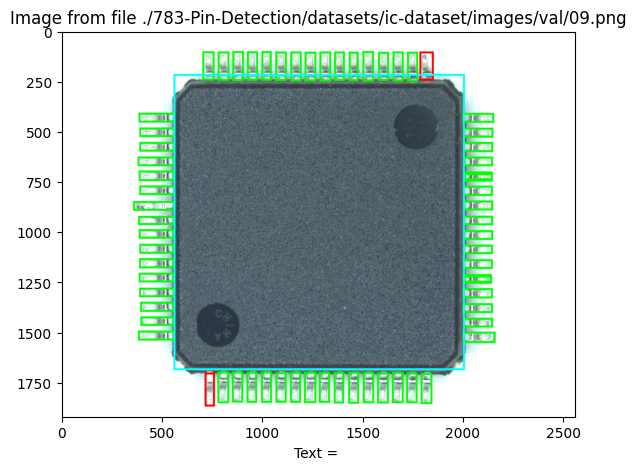

Number of bent pins in file: 0


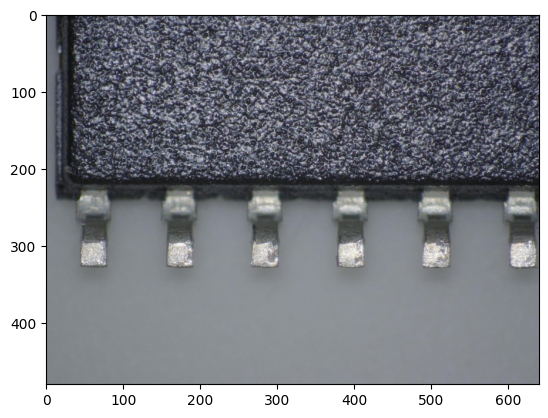


0: 608x800 6 okays, 1 package, 193.8ms
Speed: 2.0ms preprocess, 193.8ms inference, 0.5ms postprocess per image at shape (1, 3, 608, 800)
### detector.py: It took 0.3519327640533447 seconds to execute!


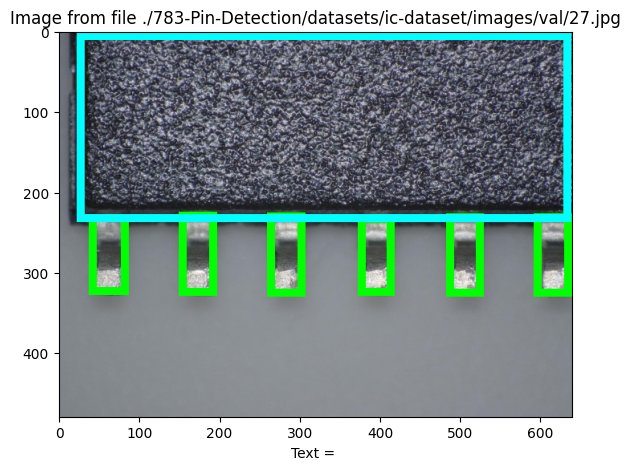

Number of bent pins in file: 0


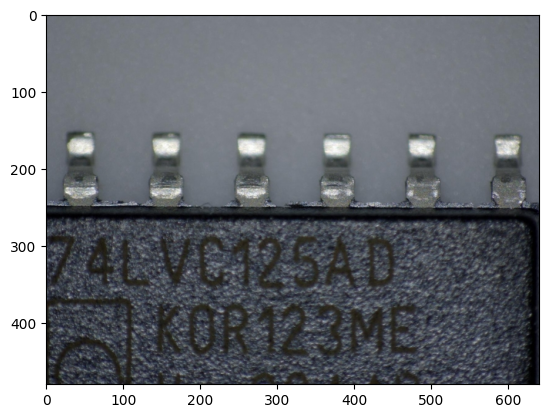


0: 608x800 6 okays, 1 package, 1 text, 222.0ms
Speed: 1.9ms preprocess, 222.0ms inference, 0.4ms postprocess per image at shape (1, 3, 608, 800)
### detector.py: It took 0.3507347106933594 seconds to execute!


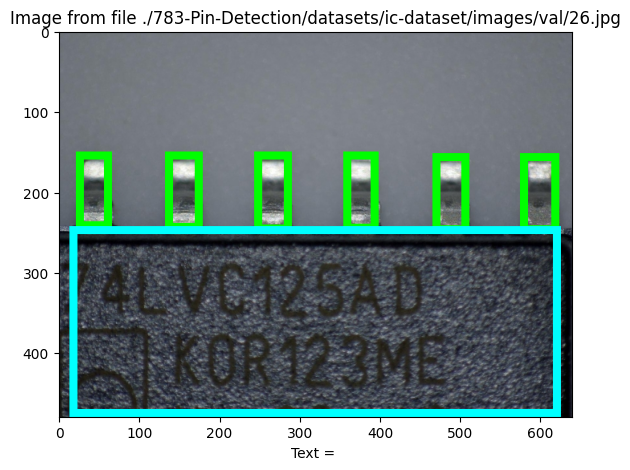

Number of bent pins in file: 0


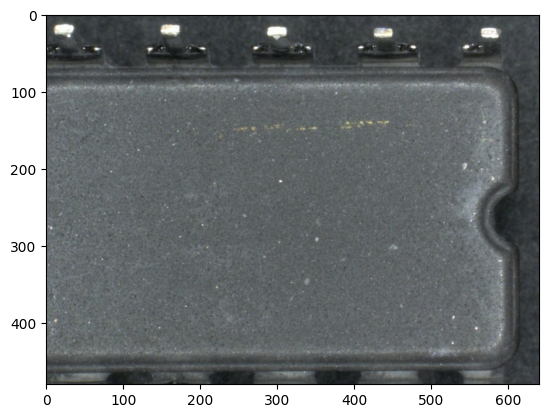


0: 608x800 3 okays, 1 package, 223.5ms
Speed: 2.3ms preprocess, 223.5ms inference, 0.5ms postprocess per image at shape (1, 3, 608, 800)
### detector.py: It took 0.4838550090789795 seconds to execute!


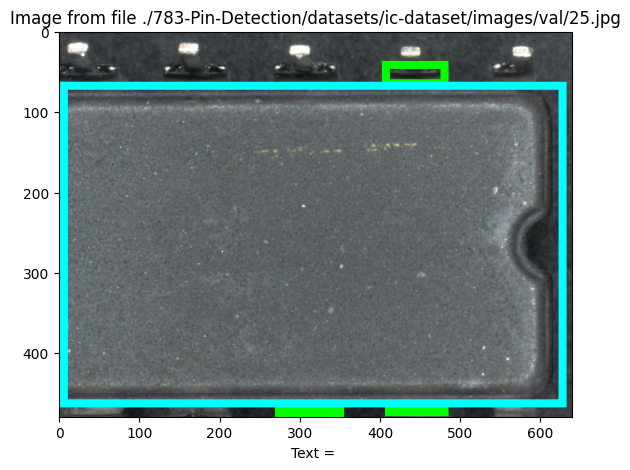

In [7]:
de = Detector()
de.add_to_command_tree('-no-text', [])
de.add_to_command_tree('-show', [])
de.add_to_command_tree('-overlay-good-pin', ['c1'])
de.add_to_command_tree('-overlay-bent-pin', ['c0'])
de.add_to_command_tree('-overlay-package', ['c5'])
#de.add_to_command_tree('-model-n', [65])

input_image_folder  = './783-Pin-Detection/datasets/ic-dataset/images/val'
input_label_folder  ='./783-Pin-Detection/datasets/ic-dataset/labels/val'

image_files = [f for f in os.listdir(input_image_folder) if f.endswith(('.png', '.jpg'))]

for i, image_file in enumerate(image_files):
    image_path = os.path.join(input_image_folder, image_file)
    image = Image.open(image_path).convert('RGB')
    image_width, image_height = image.size

    label_file = os.path.splitext(image_file)[0] + '.txt'
    label_path = os.path.join(input_label_folder, label_file)
    boxes = get_boxes(read_boxes(label_path), cl=0)


    print(f'Number of bent pins in file: {len(boxes)}')
    compare_image = overlay_good_pins(image, boxes)
    plt.imshow(compare_image)
    plt.show()

    de.execute(image_path)
